In [1]:
import numpy as np


In [7]:
p = np.poly1d([2,1,3,4])

In [10]:
q = np.poly1d([4,5,2])

In [13]:
h = p*q

In [14]:
h.r

array([ 0.25 +1.39194109j,  0.25 -1.39194109j, -1.   +0.j        ,
       -0.625+0.33071891j, -0.625-0.33071891j])

In [15]:
import scipy.signal as sig

In [64]:
a = np.array([[-1, 1], [2, 1]])
b = np.array([[1], [1]])
c = np.array([[1., 0]])
d = np.array([[0]])

In [65]:
sys = sig.StateSpace(a, b, c)
print(sys)

tr = sig.TransferFunction(sys)

StateSpaceContinuous(
array([[-1,  1],
       [ 2,  1]]),
array([[1],
       [1]]),
array([[1., 0.]]),
array([[0.]]),
dt: None
)


In [67]:
tr
#nice so this is actually right. Thats super. 

TransferFunctionContinuous(
array([ 1.0000000e+00, -4.4408921e-16]),
array([ 1.,  0., -3.]),
dt: None
)

In [63]:
print(num)

 
1 x - 4.441e-16


In [113]:
num = np.array([1.])
den = np.array([-.0001,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,.003,.002,.1])
sys = sig.TransferFunction(num,den)
sig.StateSpace(sys).A

A = np.zeros((10,10))
A[0,9] = -.01 #delay term
A[1:,:9] = np.eye(9)
# A[0,0] = -1
A[0,0] = .5
A[0,1] = .25

A
B =np.zeros(10)
B[0]=1
B=B.reshape(10,1)
C = np.zeros((1,10))
C[0,9] = 1

sys = sig.StateSpace(A,B,C)
systr = sig.TransferFunction(sys)
print(np.round(systr.den,decimals=5))





[ 1.   -0.5  -0.25  0.    0.    0.   -0.   -0.   -0.    0.    0.01]


In [224]:
#okay now I'm a little curious
#specify polynomial in terms of roots using
p = np.poly1d([.8,.8,.8,0,0,0,0,0,0,0,0,0,0,0],True)
q = np.poly1d([1])
q

poly1d([1])

In [225]:
xvalues = np.linspace(0,.05,200)



yvalues = [np.max(np.abs((p+xvalues[i]*q).r)) for i in range(len(xvalues))]

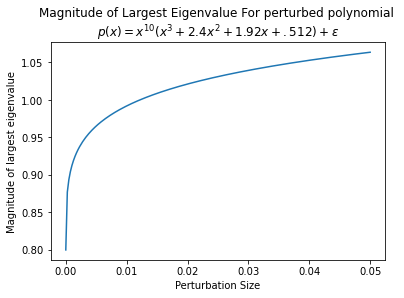

In [227]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(xvalues,yvalues)
plt.title('Magnitude of Largest Eigenvalue For perturbed polynomial \n'+ r'$p(x) = x^{10}(x^3 + 2.4x^2 + 1.92x + .512)+\epsilon$')
plt.ylabel('Magnitude of largest eigenvalue')
plt.xlabel('Perturbation Size')
plt.savefig('EigenvaluePerturbation.pdf')
plt.show()